In [4]:
!pip install rake-nltk

In [5]:
import pandas as pd
import re

In [6]:
# 유튜브 크롤링 파일 로드
path = '/home/lab10/game_analysis/preprocesing_comment/'

In [8]:
# 유튜브 크롤링 파일 로드
path = '/home/lab10/game_analysis/preprocesing_comment/'

comment_file = f'prepro_DokeV_youtube_comment.csv'     #DokeV
data = pd.read_csv(path+comment_file, encoding='utf-8', header=None)
data.columns = ['title','comment','lang']
data.drop([0], inplace=True)
data.fillna("None", inplace=True)
print(len(data))
data.head()


14291


,title,comment,lang
1,DokeV - World Premiere Gameplay Trailer | game...,do you remember the amazing longboarding scene...,(en)
2,DokeV - World Premiere Gameplay Trailer | game...,i ' ve never seen a game trailer lag beforeit ...,(en)
3,DokeV - World Premiere Gameplay Trailer | game...,: 어떻게 해서든 저 옷을 입겠다,(ko)
4,DokeV - World Premiere Gameplay Trailer | game...,this trailer looks awesome i hope my video wil...,(en)
5,DokeV - World Premiere Gameplay Trailer | game...,omg my laptop ll boom i m waiting for this game,(en)


In [10]:
data_ko = pd.DataFrame([kor[1:2] for kor in data.values if kor[2] == '(ko)'], columns=['comment'])
data_en = pd.DataFrame([en[1:2] for en in data.values if en[2] == '(en)'], columns=['comment'])
data_en.comment.values

array(['do you remember the amazing longboarding scene from the trailer check out the youtube channel of 롱보드 유지uz who helped us capture his longboard motions and watch his fascinating videos about longboarding https : / / wwwyoutubecom / uzseok',
       "i ' ve never seen a game trailer lag beforeit ' s a good sign that we are seeing actual unedited gameplaygood luck to your pc though",
       'this trailer looks awesome i hope my video will help people to know about these cuties creatures',
       ...,
       "how can any of these guys consider themselves gamers and not even play a free cod alpha it ' s the biggest selling fps every year",
       'you still have kidsmoove here get rid of him bro so annoying',
       '뽜'], dtype=object)

In [11]:
for i in range(len(data_en.comment)):
    data_en.comment[i] = str(data_en.comment[i])


In [12]:
# 숫자제거 / 밑줄 제외한 특수문자 제거
p = re.compile("[0-9]+")
q = re.compile("\W+")
r = re.compile('[^a-zA-Z]+')

en = []
for i in data_en.comment.values:
    tokens = re.sub(p," ",i)
    tokens = re.sub(q," ",tokens)
    tokens = re.sub(r," ", tokens)
    en.append(tokens)
len(en)

3909

In [13]:
en[:2]

['do you remember the amazing longboarding scene from the trailer check out the youtube channel of uz who helped us capture his longboard motions and watch his fascinating videos about longboarding https wwwyoutubecom uzseok',
 'i ve never seen a game trailer lag beforeit s a good sign that we are seeing actual unedited gameplaygood luck to your pc though']

In [14]:
# 불용어 제거
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [15]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/lab10/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/lab10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lab10/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
stop_words = set(stopwords.words('english')) 
stop_words.update(('game','games','trailer','None','lol','people','pc','https','http','www','youtube','com'))

res=[]
for i in range(len(en)):
    word_tokens = word_tokenize(en[i])

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
    res.append(result)

# print(word_tokens) 
print(res[:10])
print(len(res))

[['remember', 'amazing', 'longboarding', 'scene', 'check', 'channel', 'uz', 'helped', 'us', 'capture', 'longboard', 'motions', 'watch', 'fascinating', 'videos', 'longboarding', 'wwwyoutubecom', 'uzseok'], ['never', 'seen', 'lag', 'beforeit', 'good', 'sign', 'seeing', 'actual', 'unedited', 'gameplaygood', 'luck', 'though'], ['looks', 'awesome', 'hope', 'video', 'help', 'know', 'cuties', 'creatures'], ['omg', 'laptop', 'boom', 'waiting'], ['looks', 'absolutely', 'brilliant'], ['classic', 'gamers', 'parents', 'play', 'together', 'kids', 'actually', 'enjoy', 'awesome'], ['open', 'world', 'pok', 'mon', 'look', 'like', 'looks', 'awesome'], ['good', 'want', 'graphics', 'beyes'], ['buying', 'daughter', 'buying'], ['recommendations', 'amaze', 'looks', 'looking', 'forward', 'looks', 'interesting', 'needs', 'recognition', 'gaming', 'media', 'hope', 'coming', 'ps', 'ps']]
3909


In [17]:
en_pos = []
for i in range(len(res)):
    tokens_pos = nltk.pos_tag(res[i])
    en_pos.append(tokens_pos)
en_pos[:2]

[[('remember', 'VB'),
  ('amazing', 'JJ'),
  ('longboarding', 'VBG'),
  ('scene', 'NN'),
  ('check', 'NN'),
  ('channel', 'NN'),
  ('uz', 'NN'),
  ('helped', 'VBD'),
  ('us', 'PRP'),
  ('capture', 'VB'),
  ('longboard', 'JJ'),
  ('motions', 'NNS'),
  ('watch', 'VBP'),
  ('fascinating', 'VBG'),
  ('videos', 'NNS'),
  ('longboarding', 'VBG'),
  ('wwwyoutubecom', 'NN'),
  ('uzseok', 'NN')],
 [('never', 'RB'),
  ('seen', 'VBN'),
  ('lag', 'NN'),
  ('beforeit', 'NN'),
  ('good', 'JJ'),
  ('sign', 'NN'),
  ('seeing', 'VBG'),
  ('actual', 'JJ'),
  ('unedited', 'JJ'),
  ('gameplaygood', 'NN'),
  ('luck', 'NN'),
  ('though', 'IN')]]

In [18]:
# 명사는 NN을 포함하고 있음을 알 수 있음
en_NN=[]
for i in range(len(en_pos)):
    NN_words = []
    for word, pos in en_pos[i]:
        if 'NN' in pos:
            NN_words.append(word)
    en_NN.extend(NN_words)
en_NN[:2]

['scene', 'check']

In [19]:
#9. 빈도분석
from collections import Counter
c = Counter(en_NN) # input type should be a list of words (or tokens)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

[('looks', 232), ('pokemon', 211), ('dokev', 188), ('kids', 167), ('play', 167), ('world', 129), ('graphics', 118), ('mmo', 103), ('time', 102), ('song', 94), ('video', 89), ('abyss', 88), ('pearl', 88), ('look', 86), ('fun', 85), ('desert', 81), ('way', 75), ('thing', 71), ('gon', 70), ('something', 69)]


In [20]:
#wordclound
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

noun_text = ''
for word in en_NN:
    noun_text = noun_text +' '+word


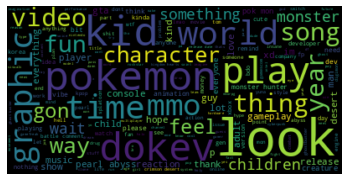

In [22]:
wordcloud = WordCloud(max_font_size=60, relative_scaling=.5).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('/home/lab10/game_analysis/wordcloud.png')

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize


In [24]:
## 3단어 이하 짧은 단어 제거
 # remove words less than three letters
# print(res[1])
# for word in res[1]:
#     print(word)
en_sent_less3=[]
for i in range(len(res)):
    tokens = [word for word in res[i] if len(word) >= 3]
    en_sent_less3.append(tokens)
en_sent_less3[:2]


[['remember',
  'amazing',
  'longboarding',
  'scene',
  'check',
  'channel',
  'helped',
  'capture',
  'longboard',
  'motions',
  'watch',
  'fascinating',
  'videos',
  'longboarding',
  'wwwyoutubecom',
  'uzseok'],
 ['never',
  'seen',
  'lag',
  'beforeit',
  'good',
  'sign',
  'seeing',
  'actual',
  'unedited',
  'gameplaygood',
  'luck',
  'though']]

In [25]:
en_sent =[]
for i in range(len(en_sent_less3)):
    temp=" ".join(en_sent_less3[i])
    en_sent.append(temp)
en_sent[:15]

['remember amazing longboarding scene check channel helped capture longboard motions watch fascinating videos longboarding wwwyoutubecom uzseok',
 'never seen lag beforeit good sign seeing actual unedited gameplaygood luck though',
 'looks awesome hope video help know cuties creatures',
 'omg laptop boom waiting',
 'looks absolutely brilliant',
 'classic gamers parents play together kids actually enjoy awesome',
 'open world pok mon look like looks awesome',
 'good want graphics beyes',
 'buying daughter buying',
 'recommendations amaze looks looking forward looks interesting needs recognition gaming media hope coming',
 'wow jeez looks insane graphics blew mind',
 'official song suits perfectly thumbs musicians composer involved making',
 'honestly coolest thing seen gaming world',
 'looks amazing',
 'willing pay full price hope micro transactions']

In [26]:
"""# 빈도수 계산을 위한 텍스트 데이터 벡터화
 - BoW 단어를 특성 벡터로 변환
 - TF-IDF 를 사용하여 단어 적합성 평가
"""

# BoW 모델로 벡터화
count = CountVectorizer(ngram_range=(3,6),
                        max_df = .1,
                        max_features=5000, stop_words=None)
docs = en_sent
bag = count.fit_transform(docs)

In [27]:
# TF_IDF 벡터화

tfidf = TfidfVectorizer(ngram_range=(3,6), # 유니그램 바이그램으로 사용
                        min_df = 3, # 3회 미만으로 등장하는 토큰은 무시
                        max_df =0.95 # 많이 등장한 단어 5%의 토큰도 무시
                        )
docs_tf = tfidf.fit_transform(docs)

In [28]:
"""# 잠재 디리클레 할당을 사용한 토픽 모델링"""

# LDA 사용 (BoW 기반)
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 6,
                                random_state = 1,
                                learning_method = 'batch')

X_topics = lda.fit_transform(bag)

In [29]:
# 결과 분석을 위해 각 토픽 당 중요 단어 3개 출력 (BoW 기반)
n_top_word = 3
feature_name = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])

토픽 1:
['also believe crazy', 'made korea especially development', 'made korea especially development environment']
토픽 2:
['agonizing rectal pain', 'inspired korean mythology', 'korean mythology folklore']
토픽 3:
['pokemon legends arceus', 'sounds like yuna', 'actually looks like']
토픽 4:
['like pok mon', 'pokemon monster hunter', 'korean mythology folklore']
토픽 5:
['black desert online', 'looks like something', 'year old man']
토픽 6:
['wonder egg priority', 'sound like yuna', 'dreams fantasies dream fly']


In [30]:
# LDA 사용 (tf-idf 기반)
lda_tfidf = LatentDirichletAllocation(n_components = 6,
                                      random_state = 1,
                                      learning_method = 'batch')

X_topics = lda_tfidf.fit_transform(docs_tf)

In [31]:
# 결과 분석을 위해 각 토픽 당 중요 단어 10개 출력 (tf-idf 기반)
n_top_word = 3
feature_name = count.get_feature_names()
for topic_idx, topic in enumerate(lda_tfidf.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])


토픽 1:
['abyss developing developing many', 'especially development environment know almost korean', 'grown adult could']
토픽 2:
['ducks regarded magical messengers nowhere realms', 'birds migrate disappear winter ancients thought', 'dokev art style kidsdokev']
토픽 3:
['count favorite mmo problems make', 'get next gen', 'fantasies dream fly']
토픽 4:
['dokev inspired korean', 'developing many new age time dokev', 'abyss developing developing many new']
토픽 5:
['age time dokev', 'different dokkaebi many', 'dokev name mischievous']
토픽 6:
['dokev crimson desert', 'ducks travel heaven earth water', 'grand theft auto kids']


##Rake_nltk 라이브러리

https://github.com/csurfer/rake-nltk


## Rake_nltk 이론적 배경


https://www.researchgate.net/publication/227988510_Automatic_Keyword_Extraction_from_Individual_Documents

In [32]:
from rake_nltk import Rake

In [33]:
# raw= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/youtube/영상별 댓글/comments_youtube_aespa.csv',header=None)
# raw.columns=['comments','likes']
# raw

In [34]:
en_sent[:10]

['remember amazing longboarding scene check channel helped capture longboard motions watch fascinating videos longboarding wwwyoutubecom uzseok',
 'never seen lag beforeit good sign seeing actual unedited gameplaygood luck though',
 'looks awesome hope video help know cuties creatures',
 'omg laptop boom waiting',
 'looks absolutely brilliant',
 'classic gamers parents play together kids actually enjoy awesome',
 'open world pok mon look like looks awesome',
 'good want graphics beyes',
 'buying daughter buying',
 'recommendations amaze looks looking forward looks interesting needs recognition gaming media hope coming']

In [39]:
text=". ".join(en_sent)
# text

In [40]:
# # Uses stopwords for english from NLTK, and all puntuation characters by
# # default
# r = Rake()

# # Extraction given the text.
# r.extract_keywords_from_text(<text to process>)

# # Extraction given the list of strings where each string is a sentence.
# r.extract_keywords_from_sentences(<list of sentences>)

# # To get keyword phrases ranked highest to lowest.
# r.get_ranked_phrases()

# # To get keyword phrases ranked highest to lowest with scores.
# r.get_ranked_phrases_with_scores()

In [41]:
r=Rake()
r.extract_keywords_from_text(text)
r.get_ranked_phrases_with_scores()[:10]

[(5050.571371692206,
  'explanation foreigners know wooden stick bird sotdae korean wooden stone religious building believed handed least bronze age depicts bird perched perch bird sits sotdae usually recognized duck ducks fly sky roam freely water thus ancients considered ducks travel heaven earth water dragon palace addition ducks migratory birds migrate disappear winter ancients thought ducks left underworld therefore ducks regarded magical messengers nowhere realms life also afterlife sotdae also erected entrance village prevent evil spirits miscellaneous diseases considered lower deity meaning promoting korean traditional culture dokev'),
 (5050.571371692206,
  'explanation foreigners know wooden stick bird sotdae korean wooden stone religious building believed handed least bronze age depicts bird perched perch bird sits sotdae usually recognized duck ducks fly sky roam freely water thus ancients considered ducks travel heaven earth water dragon palace addition ducks migratory bir

In [43]:
r1=Rake()
r1.extract_keywords_from_sentences(en_sent)
r1.get_ranked_phrases_with_scores()[:10]

[(5050.571371692206,
  'explanation foreigners know wooden stick bird sotdae korean wooden stone religious building believed handed least bronze age depicts bird perched perch bird sits sotdae usually recognized duck ducks fly sky roam freely water thus ancients considered ducks travel heaven earth water dragon palace addition ducks migratory birds migrate disappear winter ancients thought ducks left underworld therefore ducks regarded magical messengers nowhere realms life also afterlife sotdae also erected entrance village prevent evil spirits miscellaneous diseases considered lower deity meaning promoting korean traditional culture dokev'),
 (5050.571371692206,
  'explanation foreigners know wooden stick bird sotdae korean wooden stone religious building believed handed least bronze age depicts bird perched perch bird sits sotdae usually recognized duck ducks fly sky roam freely water thus ancients considered ducks travel heaven earth water dragon palace addition ducks migratory bir

K-means써볼까?


In [44]:
# 텍스트 단어들의 어근 원형을 추출하기 위해 함수 생성
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string

# Tf-idf 벡터화시키면서 cusotmized해준 토큰화+어근추출 방식 tokenizer인자에 넣어주기
# 벡터화시킬 Tf-idf 도구 옵션 추가해서 구축
# 1,2gram적용, 빈도수 0.05이하, 0.85이상의 빈도수 단어들 제거
tfidf_vect = TfidfVectorizer(ngram_range=(1,2),
                            min_df=0.05, max_df=0.85)
# fit_transform으로 위에서 구축한 도구로 텍스트 벡터화
ftr_vect = tfidf_vect.fit_transform(en_sent)

In [45]:
# K-means로 3개 군집으로 문서 군집화시키기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, max_iter=10000, random_state=42)
# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(ftr_vect)

# 군집화한 레이블값들을 document_df 에 추가하기
data_en['label'] = cluster_label
print(data_en.sort_values(by=['label']))

                                                comment  label
0     do you remember the amazing longboarding scene...      0
2338                                          good song      0
2339                                          nice song      0
2340                                             second      0
2341                                               subs      0
...                                                 ...    ...
2751                   i am all kinds of hype for dokev      5
2754  can you imagine how a pokemon game would look ...      5
2760  dokev might be what genshin was to me for chin...      5
2740  dokev was easily the highlight and anyone sayi...      5
2720      dokev vibes are the jolliest ive had in years      5

[3909 rows x 2 columns]


In [46]:
# 문서의 feature(단어별) cluster_centers_확인해보자
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)
# shape의 행은 클러스터 레이블, 열은 벡터화 시킨 feature(단어들)

(6, 5)
[[0.         0.         0.         0.         0.        ]
 [0.00502269 0.24828601 0.89979416 0.01029263 0.00365424]
 [0.00708455 0.98318422 0.03234342 0.01099489 0.0145479 ]
 [0.01145032 0.12707217 0.07009368 0.00280012 0.93296085]
 [0.05892025 0.07148723 0.08638043 0.91568882 0.02817593]
 [0.9296648  0.09313357 0.05396624 0.00209574 0.05488725]]


In [47]:
def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=5):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 5개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 5개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        comment = cluster_data[cluster_data['label']==cluster_num]['comment']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        comment = comment.values.tolist()
        cluster_details[cluster_num]['comment'] = comment
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 5개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['comment'][:5]}")
        print('-'*20)

feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=data_en,
                                     feature_names=feature_names,
                                     cluster_num=6,
                                     top_n_features=10)
print_cluster_details(cluster_details)

#####Cluster Num: 0

상위 5개 feature단어들:
 ['pokemon', 'play', 'looks', 'like', 'dokev']

Cluster 0으로 분류된 문서들:
['do you remember the amazing longboarding scene from the trailer check out the youtube channel of 롱보드 유지uz who helped us capture his longboard motions and watch his fascinating videos about longboarding https : / / wwwyoutubecom / uzseok', "i ' ve never seen a game trailer lag beforeit ' s a good sign that we are seeing actual unedited gameplaygood luck to your pc though", 'omg my laptop ll boom i m waiting for this game', 'how good do you want the graphics to beyes', 'no i m not buying this for my daughter i m buying this for myself']
--------------------
#####Cluster Num: 1

상위 5개 feature단어들:
 ['looks', 'like', 'play', 'dokev', 'pokemon']

Cluster 1으로 분류된 문서들:
['this trailer looks awesome i hope my video will help people to know about these cuties creatures', 'this looks absolutely brilliant', 'this is how an open world pok mon game should look like this looks awesome', 'this 

In [48]:
data_en.head()

,comment,label
0,do you remember the amazing longboarding scene...,0
1,i ' ve never seen a game trailer lag beforeit ...,0
2,this trailer looks awesome i hope my video wil...,1
3,omg my laptop ll boom i m waiting for this game,0
4,this looks absolutely brilliant,1


In [49]:
# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity


In [50]:

hotel_idx = data_en[data_en['label']==1].index
print("호텔 카테고리로 클러스터링된 문서들의 인덱스:\n",hotel_idx)
print()
# 호텔 카테고리로 클러스터링 된 문서들의 인덱스 중 하나 선택해 비교 기준으로 삼을 문서 선정
comparison_doc = data_en.iloc[hotel_idx[0]]['comment']
print("##유사도 비교 기준 문서 이름:",comparison_doc,'##')
print()

# 위에서 추출한 호텔 카테고리로 클러스터링된 문서들의 인덱스 중 0번인덱스(비교기준문서)제외한
# 다른 문서들과의 유사도 측정
similarity = cosine_similarity(ftr_vect[hotel_idx[0]], ftr_vect[hotel_idx])
# print(similarity)


호텔 카테고리로 클러스터링된 문서들의 인덱스:
 Int64Index([   2,    4,    6,    9,   10,   13,   17,   19,   52,   53,
            ...
            3761, 3802, 3803, 3809, 3825, 3826, 3831, 3833, 3843, 3851],
           dtype='int64', length=362)

##유사도 비교 기준 문서 이름: this trailer looks awesome i hope my video will help people to know about these cuties creatures ##




길이 비교 361 361



Text(0.5, 1.0, 'this trailer looks awesome i hope my video will help people to know about these cuties creatures')

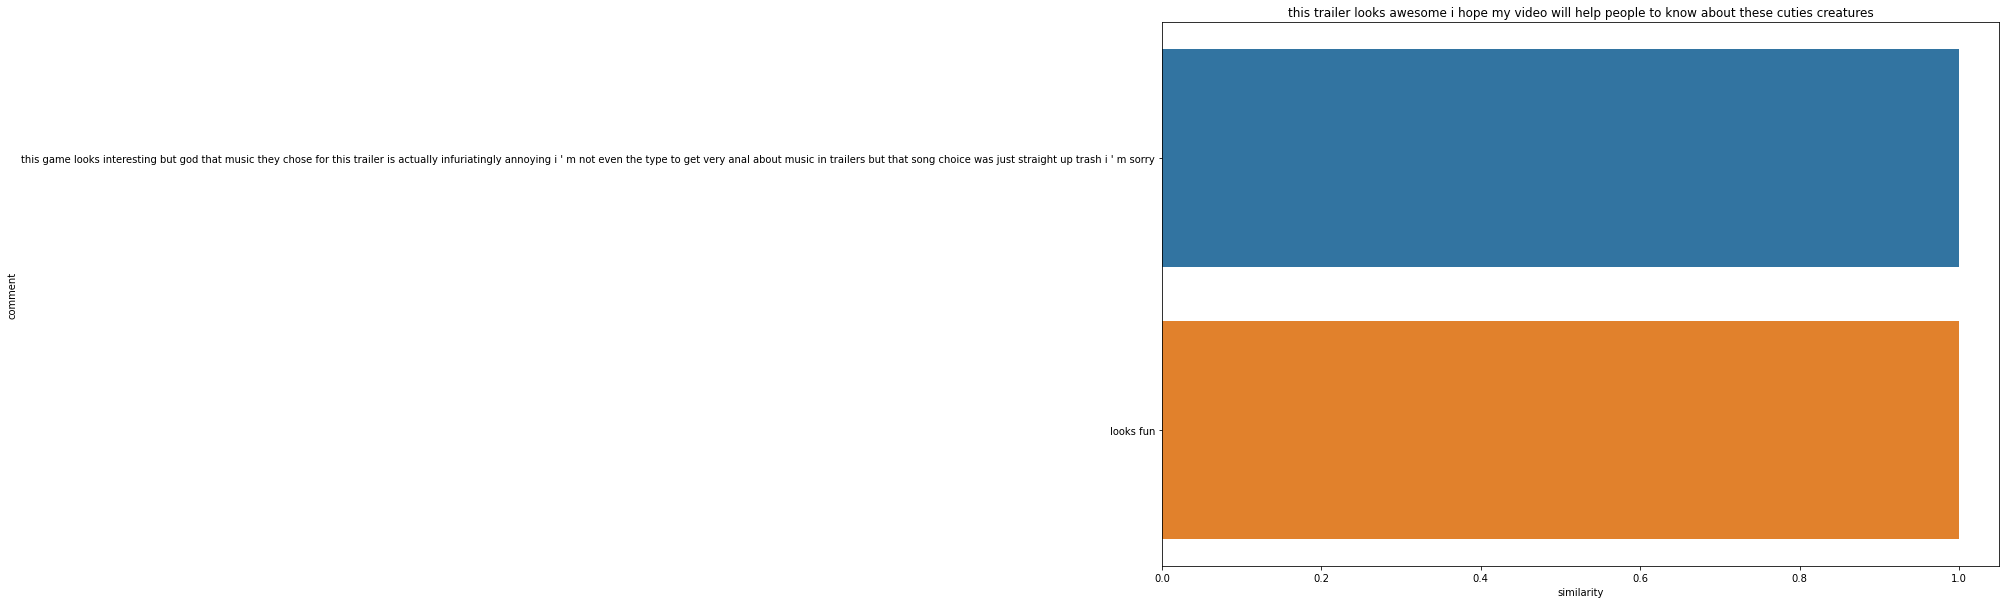

In [55]:
# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든행에 대해서 열을 내림차순으로!
sorted_idx = similarity.argsort()[:,::-1]
# 비교문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]

# 유사도가 큰 순으로 hotel_idx(label=1인 즉, 호텔과관련된 내용의 문서이름들의 index들)에서 재 정렬 
# index로 넣으려면 1차원으로 reshape해주기!
hotel_sorted_idx = hotel_idx[sorted_idx.reshape(-1,)]
# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
hotel_sim_values = np.sort(similarity.reshape(-1,))[::-1]
hotel_sim_values = hotel_sim_values[1:]
# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
# print(hotel_sorted_idx)
# print(hotel_sim_values)
print()
print("길이 비교", len(hotel_sorted_idx), len(hotel_sim_values))
print()
# 빈 데이터프레임 생성
hotel_sim_df = pd.DataFrame()
# hotel_sorted_idx 와 hotel_sim_values 매핑시킨 array임
hotel_sim_df['comment'] = data_en.iloc[hotel_sorted_idx]['comment']
hotel_sim_df['similarity'] = hotel_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=hotel_sim_df[:10], x='similarity', y='comment')
plt.title(comparison_doc)

https://techblog-history-younghunjo1.tistory.com/114

Text Rank


In [41]:
'''
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import time
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import time
time.sleep(1)
def get_TR(C, d, TR, n, decimal):
    new_TR = deepcopy(TR)
    for idx in range(n):
        res = 0
        for near_idx in range(n):
            if C[idx][near_idx] == 0: continue
            res += C[idx][near_idx] / sum(C[near_idx]) * new_TR[near_idx]
        res = (1-d)/n + d * res
        new_TR[idx] = round(res, decimal)
    return new_TR

def TextRank(C,d, TR, N,decimal):
    new_TR = deepcopy(TR)
    for x in range(N):
        res = 0 
        for y in range(N):
            res += C[x][y] / sum(C[y]) * new_TR[y]
        res = (1-d)/N +d * res
        new_TR[x] = round(res, decimal)
    return new_TR

def update_TR(C, d=1, stp=1, decimal=2):
    """
    step : 반복 횟수
    decimal : TR 값 소수점 표출 자리수 지정
    """
    n = C.shape[0]
    TR = [1/n for _ in range(n)]
    TRs = [TR]
    errors = []
    for _ in range(step):
        new_TR = get_TR(C, d, TR, n, decimal)
        error = sum([abs(TR[i] - new_TR[i]) for i in range(n)])
        errors.append(error)
        TRs.append(new_TR)
        TR = new_TR
    return TRs, errors

Text =  np.array([[0, 0.2, 0, 0.3],
                  [0.2, 0, 0.4, 0],
                  [0, 0.4, 0, 0],
                  [0.3, 0, 0, 0]])
N=Text.shape[0]
TRs, errors = update_TR(Text, d=0.85, step=10, decimal=4)

# print(TRs)
# for TR in TRs:
#      print(TR)
# print()
print(f"final TR : {TRs[-1]}")
print()

plt.plot(errors)
plt.xlabel('Number of iterations')
plt.ylabel('Error rate')
plt.show()
'''

'\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom copy import deepcopy\nimport time\nimport nltk\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.metrics.pairwise import cosine_similarity\nimport time\ntime.sleep(1)\ndef get_TR(C, d, TR, n, decimal):\n    new_TR = deepcopy(TR)\n    for idx in range(n):\n        res = 0\n        for near_idx in range(n):\n            if C[idx][near_idx] == 0: continue\n            res += C[idx][near_idx] / sum(C[near_idx]) * new_TR[near_idx]\n        res = (1-d)/n + d * res\n        new_TR[idx] = round(res, decimal)\n    return new_TR\n\ndef TextRank(C,d, TR, N,decimal):\n    new_TR = deepcopy(TR)\n    for x in range(N):\n        res = 0 \n        for y in range(N):\n            res += C[x][y] / sum(C[y]) * new_TR[y]\n        res = (1-d)/N +d * res\n        new_TR[x] = round(res, decimal)\n    return new_TR\n\ndef update_TR(C, d=1, stp=1, decimal=2):\n    """\n    step : 반복 횟수\n    decimal : TR 값 소수점 표출 자리수 지정\n    "

In [42]:
# text='''\
# Maria Sharapova has basically no friends as tennis players on the WTA Tour. \
# The Russian player has no problems in openly speaking about it and in a recent interview she said: \
# 'I don't really hide any feelings too much. I think everyone knows this is my job here. \
# When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every \
# single person whether they're in the locker room or across the net. So I'm not the one to strike up \
# a conversation about the weather and know that in the next few minutes I have to go and try to win \
# a tennis match. I'm a pretty competitive girl. I say my hellos, but I'm not sending any players \
# flowers as well. Uhm, I'm not really friendly or close to many players. I have not a lot of friends \
# away from the courts.' When she said she is not really close to a lot of players, is that something \
# strategic that she is doing? Is it different on the men's tour than the women's tour? 'No, not at all. \
# I think just because you're in the same sport doesn't mean that you have to be friends with everyone \
# just because you're categorized, you're a tennis player, so you're going to get along with tennis players. \
# I think every person has different interests. I have friends that have completely different jobs and interests, \
# and I've met them in very different parts of my life. I think everyone just thinks because we're tennis players \
# we should be the greatest of friends. But ultimately tennis is just a very small part of what we do. \
# There are so many other things that we're interested in, that we do.' ALSO READ: Maria Sharapova reveals \
# how tennis keeps her motivated.'''

# # stopwords = nltk.corpus.stopwords.words('english')
# # stopwords.extend(['.'])

# # sentences_org = nltk.sent_tokenize(text)
# # sentences = []
# # print('데이터 전처리 시작...')
# # for sentence in sentences_org:
# #     words = nltk.word_tokenize(sentence)
# #     words = [word for word in words if word not in stopwords] # 불용어 제거
# #     words = [word.lower() for word in words] # 소문자 변환
# #     sentences.append(' '.join(words))
# # print('데이터 전처리 종료...')
# # print()
'''
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(en_sent).toarray()
n = tfidf_matrix.shape[0]
C = np.zeros(shape=(n, n))
print('유사도 행렬(C) 계산 시작...')
for i in range(n):
    for j in range(n):
        sim = cosine_similarity(tfidf_matrix[i:i+1], tfidf_matrix[j:j+1])
        C[i][j] = sim
        C[j][i] = sim
np.fill_diagonal(C, 0)
print('유사도 행렬(C) 계산 종료...')
print()

# print(C)
# print()

print('TR 업데이트 시작...')
TRs, errors = update_TR(C, d=0.85, step=10, decimal=3)
print('TR 업데이트 종료...')
print()

# for TR in TRs:
#     print(TR)
# print()

final_TR = TRs[-1]
print(f"final TR : {final_TR}")
print()

imp_sentence_idx = np.argmax(final_TR)
print(f"most important sentence : {en[imp_sentence_idx]}")
print()

plt.plot(errors)
plt.xlabel('Number of iterations')
plt.ylabel('Error rate')
plt.show()
'''

'\ntfidf = TfidfVectorizer()\ntfidf_matrix = tfidf.fit_transform(en_sent).toarray()\nn = tfidf_matrix.shape[0]\nC = np.zeros(shape=(n, n))\nprint(\'유사도 행렬(C) 계산 시작...\')\nfor i in range(n):\n    for j in range(n):\n        sim = cosine_similarity(tfidf_matrix[i:i+1], tfidf_matrix[j:j+1])\n        C[i][j] = sim\n        C[j][i] = sim\nnp.fill_diagonal(C, 0)\nprint(\'유사도 행렬(C) 계산 종료...\')\nprint()\n\n# print(C)\n# print()\n\nprint(\'TR 업데이트 시작...\')\nTRs, errors = update_TR(C, d=0.85, step=10, decimal=3)\nprint(\'TR 업데이트 종료...\')\nprint()\n\n# for TR in TRs:\n#     print(TR)\n# print()\n\nfinal_TR = TRs[-1]\nprint(f"final TR : {final_TR}")\nprint()\n\nimp_sentence_idx = np.argmax(final_TR)\nprint(f"most important sentence : {en[imp_sentence_idx]}")\nprint()\n\nplt.plot(errors)\nplt.xlabel(\'Number of iterations\')\nplt.ylabel(\'Error rate\')\nplt.show()\n'

In [43]:
from collections import Counter

def scan_vocabulary(sents, tokenize, min_count=2):
    counter = Counter(w for sent in sents for w in tokenize(sent))
    counter = {w:c for w,c in counter.items() if c >= min_count}
    idx_to_vocab = [w for w, _ in sorted(counter.items(), key=lambda x:-x[1])]
    vocab_to_idx = {vocab:idx for idx, vocab in enumerate(idx_to_vocab)}
    return idx_to_vocab, vocab_to_idx
    
from collections import defaultdict

def cooccurrence(tokens, vocab_to_idx, window=2, min_cooccurrence=2):
    counter = defaultdict(int)
    for s, tokens_i in enumerate(tokens):
        vocabs = [vocab_to_idx[w] for w in tokens_i if w in vocab_to_idx]
        n = len(vocabs)
        for i, v in enumerate(vocabs):
            if window <= 0:
                b, e = 0, n
            else:
                b = max(0, i - window)
                e = min(i + window, n)
            for j in range(b, e):
                if i == j:
                    continue
                counter[(v, vocabs[j])] += 1
                counter[(vocabs[j], v)] += 1
    counter = {k:v for k,v in counter.items() if v >= min_cooccurrence}
    n_vocabs = len(vocab_to_idx)
    return dict_to_mat(counter, n_vocabs, n_vocabs)
from scipy.sparse import csr_matrix

def dict_to_mat(d, n_rows, n_cols):
    rows, cols, data = [], [], []
    for (i, j), v in d.items():
        rows.append(i)
        cols.append(j)
        data.append(v)
    return csr_matrix((data, (rows, cols)), shape=(n_rows, n_cols))
def word_graph(sents, tokenize=None, min_count=2, window=2, min_cooccurrence=2):
    idx_to_vocab, vocab_to_idx = scan_vocabulary(sents, tokenize, min_count)
    tokens = [tokenize(sent) for sent in sents]
    g = cooccurrence(tokens, vocab_to_idx, window, min_cooccurrence, verbose)
    return g, idx_to_vocab
import numpy as np
from sklearn.preprocessing import normalize

def pagerank(x, df=0.85, max_iter=30):
    assert 0 < df < 1

    # initialize
    A = normalize(x, axis=0, norm='l1')
    R = np.ones(A.shape[0]).reshape(-1,1)
    bias = (1 - df) * np.ones(A.shape[0]).reshape(-1,1)

    # iteration
    for _ in range(max_iter):
        R = df * (A * R) + bias

    return R
def textrank_keyword(sents, tokenize, min_count, window, min_cooccurrence, df=0.85, max_iter=30, topk=30):
    g, idx_to_vocab = word_graph(sents, tokenize, min_count, window, min_cooccurrence)
    R = pagerank(g, df, max_iter).reshape(-1)
    idxs = R.argsort()[-topk:]
    keywords = [(idx_to_vocab[idx], R[idx]) for idx in reversed(idxs)]
    return keywords

from collections import Counter
from scipy.sparse import csr_matrix
import math

def sent_graph(sents, tokenize, similarity, min_count=2, min_sim=0.3):
    _, vocab_to_idx = scan_vocabulary(sents, tokenize, min_count)

    tokens = [[w for w in tokenize(sent) if w in vocab_to_idx] for sent in sents]
    rows, cols, data = [], [], []
    n_sents = len(tokens)
    for i, tokens_i in enumerate(tokens):
        for j, tokens_j in enumerate(tokens):
            if i >= j:
                continue
            sim = similarity(tokens_i, tokens_j)
            if sim < min_sim:
                continue
            rows.append(i)
            cols.append(j)
            data.append(sim)
    return csr_matrix((data, (rows, cols)), shape=(n_sents, n_sents))

def textrank_sent_sim(s1, s2):
    n1 = len(s1)
    n2 = len(s2)
    if (n1 <= 1) or (n2 <= 1):
        return 0
    common = len(set(s1).intersection(set(s2)))
    base = math.log(n1) + math.log(n2)
    return common / base

def cosine_sent_sim(s1, s2):
    if (not s1) or (not s2):
        return 0

    s1 = Counter(s1)
    s2 = Counter(s2)
    norm1 = math.sqrt(sum(v ** 2 for v in s1.values()))
    norm2 = math.sqrt(sum(v ** 2 for v in s2.values()))
    prod = 0
    for k, v in s1.items():
        prod += v * s2.get(k, 0)
    return prod / (norm1 * norm2)
def textrank_keysentence(sents, tokenize, min_count, similarity, df=0.85, max_iter=30, topk=5):
    g = sent_graph(sents, tokenize, min_count, min_sim, similarity)
    R = pagerank(g, df, max_iter).reshape(-1)
    idxs = R.argsort()[-topk:]
    keysents = [(idx, R[idx], sents[idx]) for idx in reversed(idxs)]
    return keysents

In [44]:
!pip install textrank

In [45]:
'''
from textrank import KeywordSummarizer
def nltk_tokenize(sent):
    words = nltk.pos_tag(sent, join=True)
    words = [w for w in words if ('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]
    return words

keyword_extractor = KeywordSummarizer(
    tokenize = nltk_tokenize,
    window = -1,
    verbose = False
)

keywords = keyword_extractor.summarize(res, topk=30)
    
def komoran_tokenize(sent):
    return komoran.pos(sent, join=True)

keyword_extractor = KeywordSummarizer(tokenize = komoran_tokenize, window = -1)
keywords = keyword_extractor.summarize(sents, topk=30)

def komoran_tokenize(sent):
    words = komoran.pos(sent, join=True)
    words = [w for w in words if ('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]
    return words

keyword_extractor = KeywordSummarizer(tokenize = komoran_tokenize, window = 2)
keywords = keyword_extractor.summarize(sents, topk=30)

from textrank import KeysentenceSummarizer

summarizer = KeysentenceSummarizer(tokenize = komoran_tokenize, min_sim = 0.5)
keysents = summarizer.summarize(sents, topk=10)

summarizer = KeysentenceSummarizer(tokenize = komoran_tokenizer, min_sim = 0.3)
keysents = summarizer.summarize(sents, topk=3)


def subword_tokenizer(sent, n=3):
    def subword(token, n):
        if len(token) <= n:
            return [token]
        return [token[i:i+n] for i in range(len(token) - n)]
    return [sub for token in sent.split() for sub in subword(token, n)]

subword_tokenizer('이것은 부분단어의 예시입니다 짧은 어절은 그대로 나옵니다')
# ['이것은', '부분단', '분단어', '단어의', '예시입', '시입니', '입니다', '짧은', '어절은', '그대로', '나옵니', '옵니다']

summarizer = KeysentenceSummarizer(tokenize = subword_tokenizer, min_sim = 0.3)
keysents = summarizer.summarize(sents, topk=3)


summarizer.R

import numpy as np

bias = np.ones(len(sents))
bias[-1] = 10
keysents = summarizer.summarize(sents, topk=3, bias=bias)

summarizer.R
'''

"\nfrom textrank import KeywordSummarizer\ndef nltk_tokenize(sent):\n    words = nltk.pos_tag(sent, join=True)\n    words = [w for w in words if ('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]\n    return words\n\nkeyword_extractor = KeywordSummarizer(\n    tokenize = nltk_tokenize,\n    window = -1,\n    verbose = False\n)\n\nkeywords = keyword_extractor.summarize(res, topk=30)\n    \ndef komoran_tokenize(sent):\n    return komoran.pos(sent, join=True)\n\nkeyword_extractor = KeywordSummarizer(tokenize = komoran_tokenize, window = -1)\nkeywords = keyword_extractor.summarize(sents, topk=30)\n\ndef komoran_tokenize(sent):\n    words = komoran.pos(sent, join=True)\n    words = [w for w in words if ('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]\n    return words\n\nkeyword_extractor = KeywordSummarizer(tokenize = komoran_tokenize, window = 2)\nkeywords = keyword_extractor.summarize(sents, topk=30)\n\nfrom textrank import KeysentenceSummarizer\n\nsummarizer = KeysentenceSum

In [ ]:
from gensim.summarization.summarizer import summarize
en_total=[]
for i in range(len(en_sent)):
    en_total.append(en_sent[i])
en_total[:10]
a="\n".join(en_total)
summarize(a).split('\n')

Word2vec